In [1]:
%matplotlib inline


==========================================
One-class SVM with non-linear kernel (RBF)
==========================================

An example using a one-class SVM for novelty detection.

:ref:`One-class SVM <svm_outlier_detection>` is an unsupervised
algorithm that learns a decision function for novelty detection:
classifying new data as similar or different to the training set.


Automatically created module for IPython interactive environment


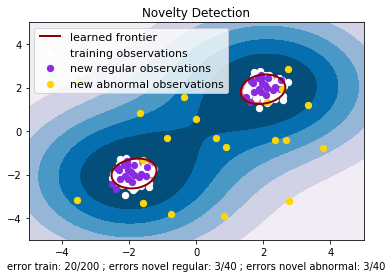

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s)
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s)
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [4]:
print(X_train)


[[ 2.3503637   2.07424088]
 [ 2.06483724  2.23306662]
 [ 2.14543987  2.03775539]
 [ 1.6778284   2.47502192]
 [ 2.14883045  2.01036135]
 [ 2.08086402  1.64997468]
 [ 1.9864183   1.91723459]
 [ 1.98085441  2.07100514]
 [ 1.86995216  2.12021033]
 [ 2.07682475  2.41638797]
 [ 2.03737828  2.55874161]
 [ 2.07925521  2.02834265]
 [ 1.73662188  2.08762878]
 [ 2.14344377  2.32179297]
 [ 1.51278652  2.00658231]
 [ 1.99815609  1.87874142]
 [ 1.96371248  2.51287849]
 [ 2.63157914  2.05803135]
 [ 2.16313072  2.55922387]
 [ 2.58140277  1.40827263]
 [ 2.49953617  2.09524988]
 [ 1.97003119  1.67897575]
 [ 1.86142091  2.06285338]
 [ 2.33312515  2.1437487 ]
 [ 1.73539438  2.15150252]
 [ 1.87646488  1.97478151]
 [ 1.66820827  1.93077527]
 [ 2.24372405  1.8175767 ]
 [ 2.01680224  1.67390964]
 [ 1.92934071  2.0895352 ]
 [ 2.12662934  2.05554987]
 [ 1.99575563  1.84197763]
 [ 2.02416896  2.09393567]
 [ 1.90982744  1.6749794 ]
 [ 1.77705494  2.56390938]
 [ 1.72944356  2.71178343]
 [ 1.94937615  1.77063798]
 